# Course work

0. Import the libraries that you will need
```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
```
1. Get the data - in the cell below run: **Note** you only need to run this command the first time you do the exercise. If you save and go away and come back, then can skip straight to step 2.
```
!python get-my-data.py
```
2. Read in the csv:
```
df = pd.read_csv('coursework-data.csv')
```
3. Perform some exploratory data analysis to clean up the dataset. The code needed for this part is found in the first set of exercises that you did. 
    - Remove outliers
    - If any pairs of variables are highly correlated, remove one of the pair - highly correlated in this case > 0.99

4. Fit a baseline model, linear regression to map the control parameters (all parameters *except* `gllbsc_gap`) to the dependent parameter `gllbsc_gap`. Summarise its performance. 

To set up the data use:
```
x = df.loc[:, df.columns != "gllbsc_gap"].values
y = df.loc[:, df.columns == "gllbsc_gap"].values
```
The rest of the code you need for this found in the second set of exercises that you did. 

- From looking at the linear regression model, which features have the greatest influence on the band gap?


## <span style="color:red"> Important notes</span>

### Submitting the coursework

When you are finished with the coursework - use `File > Save and Export Notebook As > pdf` to download a pdf of the completed notebook. Submit this pdf _via_ the portal on QMplus. 

<span style="color:red"> The deadline for submission is Sunday, 24 March 2024, 11:59 PM.</span>

### Text explanations

**Please please please** add text to explain what you are doing in the code. Adding text boxes is easy, just add a new cell as normal then change the type to `Markdown` with the dropdown menu at the top of the cells. Adding text will make sure that markers can give you proper grades even if you make a small slip in your code. If you have no text explanation and still have a small slip, **you will likely get no marks**!

### Datasets

All of your datasets are generated randomly. So do not expect the same answers as your friends. If you compare answers and find that you have something very different, do not worry.

### Warnings from the code

Don't worry if the code throws some warnings sometimes. If it keeps running then it is fine. Warnings usually just alert you to future planned changes in the code you are using.

### Long run times

There is a certain part of the exercise where a grid search is required. It could take quite a long time with this code. I have tested it and it took about 15 minutes for a 10-fold cross validation on a 5x5 gridsearch. Dont worry if it seems to be running for a long time, that's okay.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
!python get-my-data.py

File already exists no more to see here.


## _Reason For Code_

- By reading the data using pandas and checking the column names, we can establish how many boxplots need to be created in the next step.

### _Explanation of Code_

1. column_names = list(df.columns): 
   - Converts the column names of the df DataFrame into a list and stores it in the column_names variable.  
   - This list is used to access individual columns for plotting.

In [9]:
df = pd.read_csv('coursework-data.csv')

In [10]:
column_names = list(df.columns)
print(column_names)

['Number dev', 'MeltT dev', 'NdValence dev', 'GS mean', 'NValence mean', 'MeltT mean', 'CovRad dev', 'Spg dev', 'Mendeleev dev', 'GS dev', 'Eneg dev', 'gllbsc_gap', 'Periodic nature', 'LUMO values', 'Weight dev', 'HOMO_energy']


## _Reason For Code_

- The following code creates a 4x4 grid of subplots, resulting in 16 boxplots altogether. A nested loop is used to iterate through the rows and columns, ensuring that each data feature has a corresponding boxplot. The expression 4*i + j assigns feature indices sequentially, with the first row containing features 0 to 3, the second row containing 4 to 7, and so forth.

### _Explanation of Code_ 

1. fig, ax = plt.subplots(4, 4, figsize=(10, 10)): 
   - This creates a 4x4 grid of subplots.  
   - fig is the figure object, while `ax is an array of axes objects corresponding to the 16 subplots.  
   - figsize=(10, 10) sets the overall size of the figure to 10 inches by 10 inches.

2. for i in range(4):  
   - Iterates over the rows of the 4x4 grid, where i represents the row index.

3. for j in range(4):  
   - Iterates over the columns of the 4x4 grid, where j represents the column index.

4. data = df[column_names[4*i + j]].values:  
   - Selects the data for the feature at position (i, j) in the 4x4 grid.  
   - column_names[4*i + j] selects the appropriate column from df based on the current row (i) and column (j) index.  
   - .values retrieves the data as a NumPy array for plotting.

5. ax[i, j].boxplot(data): 
   - Creates a boxplot for the selected data and assigns it to the subplot at position (i, j),

6. ax[i, j].set_title(column_names[4*i + j]):  
   - Sets the title of the current subplot to the name of the feature being plotted, which is taken from column_names.

7. plt.tight_layout():  
   - Adjusts the spacing between subplots to ensure that titles and labels do not overlap, creating a clean layout.

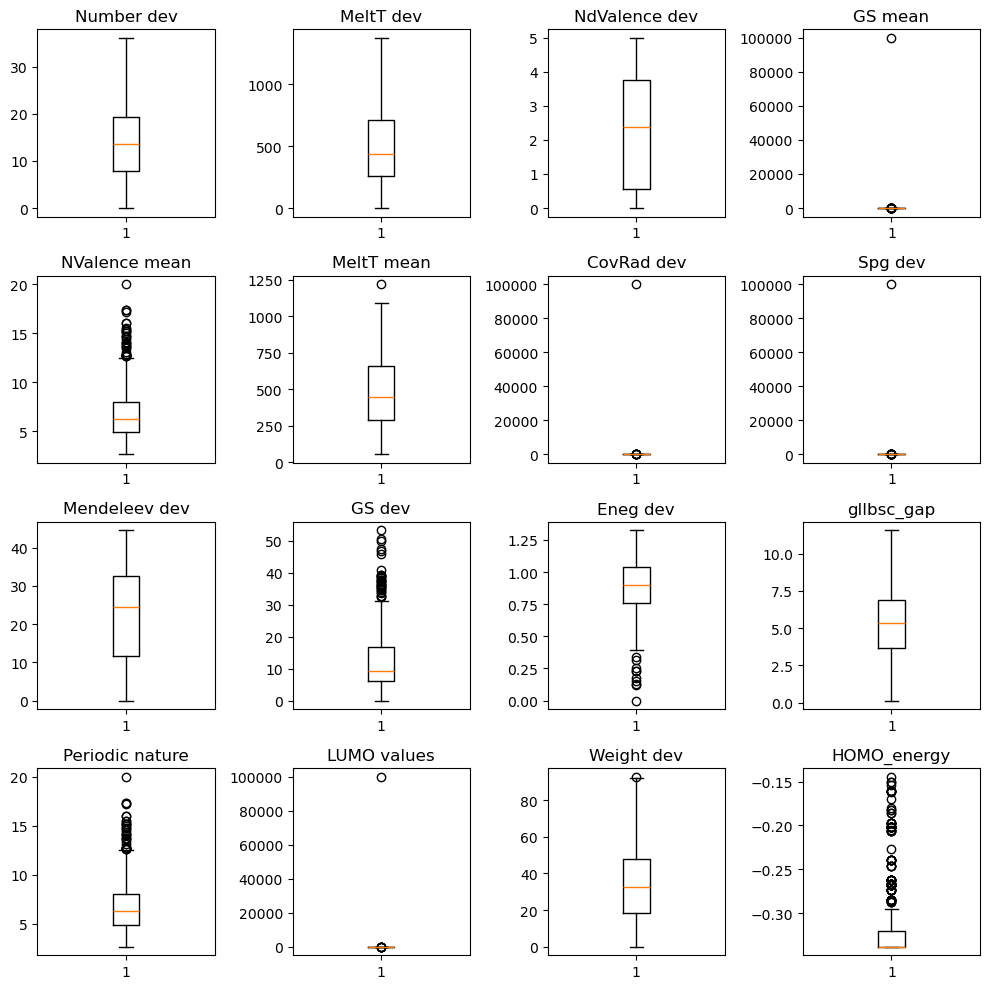

In [11]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        data = df[column_names[4*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(column_names[4*i + j])
plt.tight_layout()

## _Reason for Code_

Any data points that deviate by more than 1000 from the mean are classified as outliers and will be removed. Afterward, the dataset is saved, and a new boxplot is generated to confirm their removal.

### _Explanation of Code_ 

1. df.drop(df[df['GS mean'] >= 1000].index, inplace=True) (and similar lines for other columns)

   - Removes rows where values in specific columns (like GS mean, Spg dev, etc.) are greater than or equal to 1000, helping to eliminate extreme outliers.

2. df.to_csv('coursework-cleaned-data.csv')

   - Saves the cleaned DataFrame to a CSV file for later use.


3. fig, ax = plt.subplots(4, 4, figsize=(10, 10))

   - Creates a 4x4 grid of plots for visualising the data.

4. data = df[column_names[4 * i + j]].values

   - Selects the data for the current plot.

5. ax[i, j].boxplot(data)

   - Draws a boxplot to show the distribution of the selected data.

6. ax[i, j].set_title(column_names[4 * i + j])

   - Sets the title of each plot to the relevant column name.

7. plt.tight_layout()

   - Automatically adjusts the spacing between plots for a clearer layout.

In [22]:
df.drop(df[df['GS mean'] >= 1000].index, inplace = True)
df.drop(df[df['Spg dev'] >= 1000].index, inplace = True)
df.drop(df[df['MeltT dev'] >= 1000].index, inplace = True)
df.drop(df[df['MeltT mean'] >= 1000].index, inplace = True)
df.drop(df[df['Mendeleev dev'] >= 1000].index, inplace = True)
df.drop(df[df['CovRad dev'] >= 1000].index, inplace = True)
df.drop(df[df['LUMO values'] >= 1000].index, inplace = True)

df.to_csv('coursework-cleaned-data.csv')

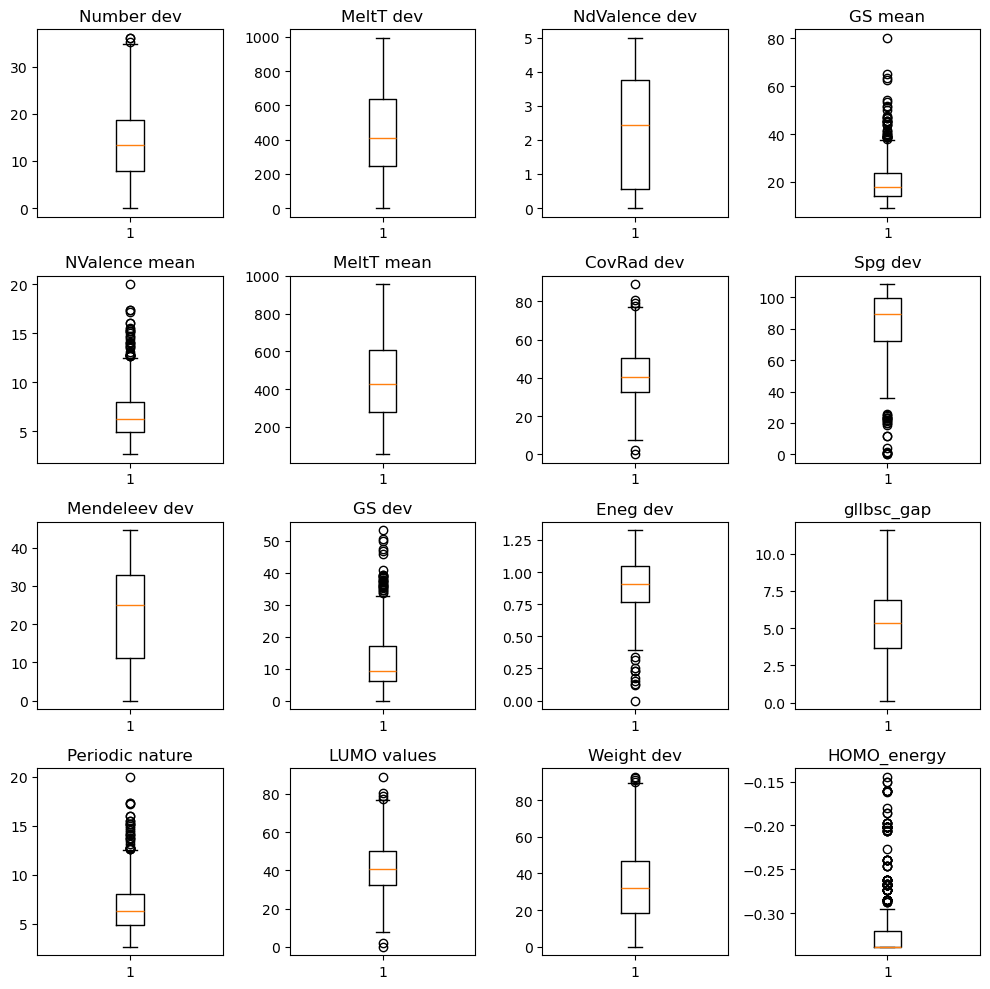

In [23]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        data = df[column_names[4*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(column_names[4*i + j])
plt.tight_layout()

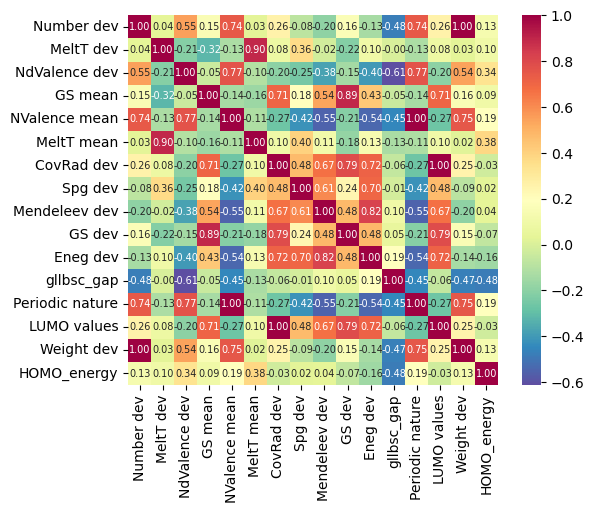

In [20]:
corrmat = df.corr()
hm = sns.heatmap(corrmat,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 7},
                yticklabels=df.columns,
                xticklabels=df.columns,
                cmap="Spectral_r")
plt.show()

## _Reason for Code_

By utilising the code from the provided eBook and past lectures, Pearson correlations can be visualised in a heatmap to examine relationships between different features. Any features with a correlation above 0.99 are deemed redundant and will be removed from the dataset, as listed below. However, despite ‘MeltT dev’ and ‘MeltT mean’ having a relatively high correlation of 0.9, they do not meet the >0.99 threshold for removal.

### _Explanation of Code_

1. df.drop(['Number dev', 'Periodic nature', 'LUMO values'], inplace=True, axis=1)

   - df.drop() Removes the specified columns from the DataFrame df.  
   - ['Number dev', 'Periodic nature', 'LUMO values']: List of column names to be dropped.  
   - inplace=True: Modifies the original DataFrame directly.  
   - axis=1: Specifies that columns (rather than rows) are to be dropped.


2. corrmat = df.corr()

   - df.corr(): Calculates the correlation matrix for numerical columns in the DataFrame.  
   - corrmat: Stores the resulting correlation matrix for use in visualisation.


3. sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=df.columns, xticklabels=df.columns, cmap="Spectral_r")

   - sns.heatmap(): Plots the correlation matrix as a heatmap.  
   - corrmat: The correlation matrix to be visualised.  
   - cbar=True: Displays a colour bar to indicate correlation strength.  
   - annot=True: Annotates the heatmap with correlation values.  
   - square=True: Ensures that each cell in the heatmap is square-shaped.  
   - fmt='.2f': Formats annotation numbers to two decimal places.  
   - annot_kws={'size': 7}: Sets the font size of the annotations to 7.  
   - yticklabels=df.columns / xticklabels=df.columns: Ensures both axis labels use the column names from the DataFrame.  
   - cmap="Spectral_r": Uses a reversed spectral colour map for the heatmap.


4. plt.show()

   - plt.show(): Displays the generated heatmap.

In [21]:
df.drop(['Number dev','Periodic nature', 'LUMO values'], inplace=True, axis=1)

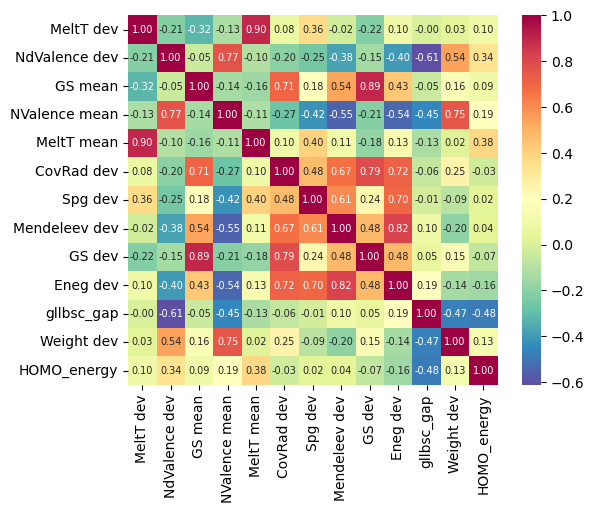

In [22]:
corrmat = df.corr()
hm = sns.heatmap(corrmat,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 7},
                yticklabels=df.columns,
                xticklabels=df.columns,
                cmap="Spectral_r")
plt.show()

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
x = df.loc[:, df.columns != "gllbsc_gap"].values
y = df.loc[:, df.columns == "gllbsc_gap"].values

## _Reason for Code_

The StandardScaler function is applied to scale multiple features along the x-axis, ensuring they have a mean of 0 and a standard deviation of 1. This standardisation prevents large numerical differences from skewing the model's learning process.

### _Explanation of Code_

1. scaler = StandardScaler()

   - scaler: This object will be used to standardise the dataset, ensuring the features have a consistent scale.

2. x_scaled = scaler.fit_transform(x)

   - fit_transform(): First, it fits the scaler to the data x by calculating its mean and standard deviation.  
   - Then, it transforms the data by scaling it so that each feature has a mean of 0 and a standard deviation of 1.  
   - x_scaled: Stores the standardised version of the original data x.data x.data x.

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## _Reason for Code_

The dataset is split into 80% for training and 20% for testing, ensuring the model learns from a substantial portion of data while being evaluated on unseen samples to enhance accuracy. This step is part of the preprocessing process.
Next, a Linear Regression model is trained using the regr code, which fits both the x and y variables. The model calculates the intercept (the predicted value when all features are zero) and the coefficients (which indicate the significance of each independent variable). This process finalises the training of the linear regression model.

### _Explanation of Code_

1. xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, random_state=0, train_size=0.8)

    - Splits the data into 80% training and 20% testing sets.  
    - random_state=0 ensures consistent results.  

2. regr = LinearRegression()

    - Creates a linear regression model.

3. regr.fit(xtrain, ytrain)

    - Fits (trains) the model using the training data.

4. print('Intercept: \n', regr.intercept_)

    - Prints the intercept of the model.

5. print('Coefficients: \n', regr.coef_)

    - Prints the coefficients for each feature.s for each feature.

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, random_state=0,
                                    train_size=0.8)
regr = LinearRegression()
regr.fit(xtrain, ytrain)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [5.36124596]
Coefficients: 
 [[-0.15675964 -1.19175324 -0.37154096  0.31511327  0.19170643 -0.95599877
  -0.35805362 -0.071879    0.90433081  0.64166585 -0.45297154 -0.64340612]]


## _Reason for Code_

Using ypred, the model generates predictions for the test set, allowing a comparison between actual and predicted values. A dashed line represents an ideal model, highlighting how much the data points deviate from it, indicating prediction errors.
This graph summarises all control parameters and their ability to predict gllbsc_gap compared to the actual values. The accuracy of these predictions depends on feature correlations and their significance in reducing errors. This is demonstrated in the final code.

1. ypred = regr.predict(xtest)

   - Uses the trained regression model to predict the target values for the test data (xtest).  
   - The predicted values are stored in ypred.d.

In [27]:
ypred = regr.predict(xtest)

## _Reason for Code_

This section determines how well the model performed using the following metrics:

- MAE (Mean Absolute Error): Calculates the average absolute difference between actual and predicted values.  
- MSE (Mean Squared Error): Measures the average squared difference, penalising larger errors more heavily.  
- RMSE (Root Mean Squared Error): Represents the square root of MSE, providing error magnitude in the same units as the data.  
- \( R^2 \) (Coefficient of Determination)**: Indicates how well the model explains variance in `gllbsc_gap`, with values closer to 1 signifying better performance.

The second section plots a graph of actual values vs predicted values on the x and y-axis respectively. It uses the plt.xlabel, plt.ylabel and plt.title functions to label the axis and give the graph a title. 

In [28]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error

print('Mean absolute error:', mean_absolute_error(ypred, ytest))
print('Mean squared error:', mean_squared_error(ypred, ytest))
print('Root mean squared error:', root_mean_squared_error(ypred, ytest))
print('r-squared:', r2_score(ypred, ytest))

Mean absolute error: 1.3318686883978732
Mean squared error: 2.9156276322226296
Root mean squared error: 1.7075209024262719
r-squared: 0.14396617517256283


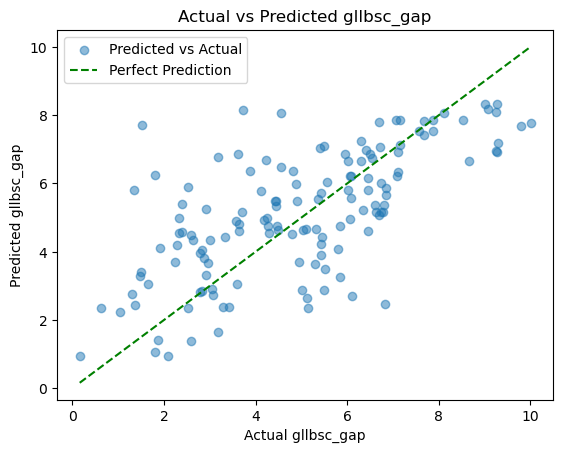

In [29]:
plt.scatter(ytest, ypred, alpha=0.5, label="Predicted vs Actual")

plt.xlabel("Actual gllbsc_gap")
plt.ylabel("Predicted gllbsc_gap")
plt.title("Actual vs Predicted gllbsc_gap")

min_val = min(min(ytest), min(ypred))
max_val = max(max(ytest), max(ypred))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='dashed', color='green', label="Perfect Prediction")


plt.legend()
plt.show()